In [1]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm
import copy


from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models"

In [2]:
df = read_run_dir(run_dir)
df  # list all the runs in our run_dir

,run_id,task,model,kwargs,num_tasks,num_examples,n_dims,n_layer,n_head,run_name
138,10Sep__lstm_20dim_1layer_80_lr0.0001_dropout0....,linear_regression,10Sep__lstm_20dim_1layer_80_lr0.0001_dropout0....,,-1,-1,20,1,8,10Sep__lstm_20dim_1layer_80_lr0.0001_dropout0....
166,10Sep_run1_lstm_20dim_10layer_80_lr0.0001_drop...,linear_regression,10Sep_run1_lstm_20dim_10layer_80_lr0.0001_drop...,,-1,-1,20,10,8,10Sep_run1_lstm_20dim_10layer_80_lr0.0001_drop...
144,10Sep_run2_lstm_20dim_10layer_80_lr0.0001_drop...,linear_regression,10Sep_run2_lstm_20dim_10layer_80_lr0.0001_drop...,,-1,-1,20,10,8,10Sep_run2_lstm_20dim_10layer_80_lr0.0001_drop...
165,10Sep_run3_lstm_20dim_10layer_80_lr0.0001_drop...,linear_regression,10Sep_run3_lstm_20dim_10layer_80_lr0.0001_drop...,,-1,-1,20,10,8,10Sep_run3_lstm_20dim_10layer_80_lr0.0001_drop...
141,10Sep_run4_lstm_20dim_10layer_80_lr0.0001_drop...,linear_regression,10Sep_run4_lstm_20dim_10layer_80_lr0.0001_drop...,,-1,-1,20,10,8,10Sep_run4_lstm_20dim_10layer_80_lr0.0001_drop...
...,...,...,...,...,...,...,...,...,...,...
0,pretrained,relu_2nn_regression,Transformer,hidden_layer_size=100,-1,-1,20,12,8,relu_2nn_regression_pretrained
181,pretrained,sparse_linear_regression,Transformer,sparsity=3,-1,-1,20,12,8,sparse_regression_pretrained
184,2d36bb71-76c1-49f4-ba6e-f0a35a42d185,test,test,,-1,100,20,10,8,test
185,e198f433-04f9-4e4b-a492-82b1dc625c9c,test,test,,-1,-1,20,10,8,test


linear_regression_pretrained pretrained


100%|██████████| 15/15 [00:00<00:00, 142340.63it/s]


6Aug_lstm_20dim_9layer_256_lr1e-4_dropout0.1 6Aug_lstm_20dim_9layer_256_lr1e-4_dropout0.1


100%|██████████| 15/15 [00:00<00:00, 231303.53it/s]

6Aug_lstm_20dim_8layer_256_lr1e-4_dropout0.1 6Aug_lstm_20dim_8layer_256_lr1e-4_dropout0.1



100%|██████████| 15/15 [00:00<00:00, 227128.38it/s]


6Aug_lstm_20dim_7layer_256_lr1e-4_dropout0.1 6Aug_lstm_20dim_7layer_256_lr1e-4_dropout0.1


100%|██████████| 15/15 [00:00<00:00, 226311.37it/s]


6Aug_lstm_20dim_6layer_256_lr1e-4_dropout0.1 6Aug_lstm_20dim_6layer_256_lr1e-4_dropout0.1


100%|██████████| 15/15 [00:00<00:00, 229615.18it/s]


6Aug_lstm_20dim_5layer_256_lr1e-4_dropout0.1 6Aug_lstm_20dim_5layer_256_lr1e-4_dropout0.1


100%|██████████| 15/15 [00:00<00:00, 231303.53it/s]


7Aug_lstm_20dim_10layer_256_lr0.0001_dropout0.1 7Aug_lstm_20dim_10layer_256_lr0.0001_dropout0.1


100%|██████████| 15/15 [00:00<00:00, 216201.24it/s]


dict_keys(['half_subspace', 'noisyLR', 'orthogonal_train_test', 'overlapping_train_test', 'random_quadrants', 'scale-x=0.333', 'scale-x=0.5', 'scale-x=2', 'scale-x=3', 'scale-y=0.333', 'scale-y=0.5', 'scale-y=2', 'scale-y=3', 'skewed', 'standard'])
{'half_subspace': {'Transformer': {'mean': [0.9632429122924805, 0.9123161315917969, 0.7510465145111084, 0.6924034118652344, 0.6116585731506348, 0.4950979232788086, 0.39366726875305175, 0.31080701351165774, 0.20295586585998535, 0.1035406231880188, 0.03663731813430786, 0.011795975267887115, 0.005011618882417679, 0.003079252317547798, 0.0027918219566345215, 0.002493770234286785, 0.0021976608783006667, 0.002169094420969486, 0.0019014213234186173, 0.0015295283868908883, 0.0013808086514472961, 0.0011476188898086547, 0.0011712506413459778, 0.001076708547770977, 0.0009131195954978466, 0.0008459294214844704, 0.0006800353527069092, 0.0005611887201666832, 0.0005421477369964122, 0.0004785127006471157, 0.00043568005785346033, 0.0004106187727302313, 0.000

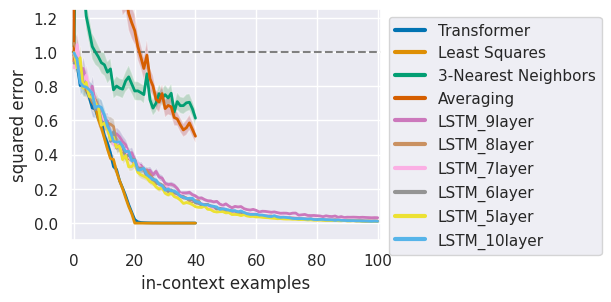

In [3]:
task = "linear_regression"
base_id = "pretrained"
expt_ids = {
    "LSTM_9layer": "6Aug_lstm_20dim_9layer_256_lr1e-4_dropout0.1",
    "LSTM_8layer": "6Aug_lstm_20dim_8layer_256_lr1e-4_dropout0.1",
    "LSTM_7layer": "6Aug_lstm_20dim_7layer_256_lr1e-4_dropout0.1",
    "LSTM_6layer": "6Aug_lstm_20dim_6layer_256_lr1e-4_dropout0.1",
    "LSTM_5layer": "6Aug_lstm_20dim_5layer_256_lr1e-4_dropout0.1",
    "LSTM_10layer": "7Aug_lstm_20dim_10layer_256_lr0.0001_dropout0.1",
}
models = ["Transformer", "Least Squares", "3-Nearest Neighbors", "Averaging"]
for key in expt_ids.keys(): 
   models.append(key)

base_path = os.path.join(run_dir, task, base_id)
expt_paths = {key: os.path.join(run_dir, task, expt_id) for key, expt_id in expt_ids.items()}

def valid_row(r, run_id):
    return r.task == task and r.run_id == run_id

def keep_before_underscore(s):
    if "_" in s:
        return s.split("_")[0]
    return s

metrics_base = collect_results(run_dir, df, valid_row=lambda r: valid_row(r, base_id))
metrics_expts = {key: collect_results(run_dir, df, valid_row=lambda r: valid_row(r, expt_id)) for key, expt_id in expt_ids.items()}

_, conf = get_model_from_run(base_path, only_conf=True)
n_dims = conf.model.n_dims

metrics = copy.deepcopy(metrics_base)

for key in metrics.keys():
    for expt_key, expt_metrics in metrics_expts.items():
        metrics[key][expt_key] = expt_metrics[key][keep_before_underscore(expt_key)]
print(metrics.keys())
print(metrics)

basic_plot(metrics["standard"], models=models)
plt.show()


linear_regression_pretrained pretrained


100%|██████████| 15/15 [00:00<00:00, 216946.76it/s]


14Sep_standard_100_lstm_20dim_5layer_512_lr0.0001_dropout0.1_curriculumFalse_p_embeddingFalse_layernormFalse 14Sep_standard_100_lstm_20dim_5layer_512_lr0.0001_dropout0.1_curriculumFalse_p_embeddingFalse_layernormFalse


100%|██████████| 15/15 [00:00<00:00, 229615.18it/s]


14Sep_skew_100_lstm_20dim_5layer_512_lr0.0001_dropout0.1_curriculumFalse_p_embeddingFalse_layernormFalse 14Sep_skew_100_lstm_20dim_5layer_512_lr0.0001_dropout0.1_curriculumFalse_p_embeddingFalse_layernormFalse


100%|██████████| 15/15 [00:00<00:00, 220752.84it/s]


13Sep_standard_100_lstm_20dim_5layer_128_lr0.0001_dropout0.1_curriculumFalse_p_embeddingFalse_layernormFalse 13Sep_standard_100_lstm_20dim_5layer_128_lr0.0001_dropout0.1_curriculumFalse_p_embeddingFalse_layernormFalse


100%|██████████| 15/15 [00:00<00:00, 227951.30it/s]


13Sep_skew_100_lstm_20dim_5layer_128_lr0.0001_dropout0.1_curriculumFalse_p_embeddingFalse_layernormFalse 13Sep_skew_100_lstm_20dim_5layer_128_lr0.0001_dropout0.1_curriculumFalse_p_embeddingFalse_layernormFalse


100%|██████████| 15/15 [00:00<00:00, 213995.10it/s]


dict_keys(['half_subspace', 'noisyLR', 'orthogonal_train_test', 'overlapping_train_test', 'random_quadrants', 'scale-x=0.333', 'scale-x=0.5', 'scale-x=2', 'scale-x=3', 'scale-y=0.333', 'scale-y=0.5', 'scale-y=2', 'scale-y=3', 'skewed', 'standard'])
{'half_subspace': {'Transformer': {'mean': [0.9632429122924805, 0.9123161315917969, 0.7510465145111084, 0.6924034118652344, 0.6116585731506348, 0.4950979232788086, 0.39366726875305175, 0.31080701351165774, 0.20295586585998535, 0.1035406231880188, 0.03663731813430786, 0.011795975267887115, 0.005011618882417679, 0.003079252317547798, 0.0027918219566345215, 0.002493770234286785, 0.0021976608783006667, 0.002169094420969486, 0.0019014213234186173, 0.0015295283868908883, 0.0013808086514472961, 0.0011476188898086547, 0.0011712506413459778, 0.001076708547770977, 0.0009131195954978466, 0.0008459294214844704, 0.0006800353527069092, 0.0005611887201666832, 0.0005421477369964122, 0.0004785127006471157, 0.00043568005785346033, 0.0004106187727302313, 0.000

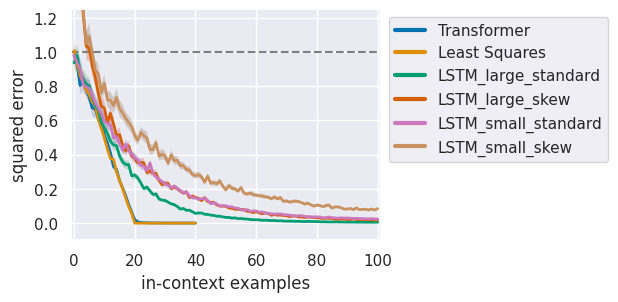

In [4]:
task = "linear_regression"
base_id = "pretrained"
expt_ids = {
"LSTM_large_standard": "14Sep_standard_100_lstm_20dim_5layer_512_lr0.0001_dropout0.1_curriculumFalse_p_embeddingFalse_layernormFalse",
"LSTM_large_skew": "14Sep_skew_100_lstm_20dim_5layer_512_lr0.0001_dropout0.1_curriculumFalse_p_embeddingFalse_layernormFalse",
"LSTM_small_standard": "13Sep_standard_100_lstm_20dim_5layer_128_lr0.0001_dropout0.1_curriculumFalse_p_embeddingFalse_layernormFalse",
"LSTM_small_skew": "13Sep_skew_100_lstm_20dim_5layer_128_lr0.0001_dropout0.1_curriculumFalse_p_embeddingFalse_layernormFalse",
}



models = ["Transformer", "Least Squares",]
for key in expt_ids.keys(): 
   models.append(key)

base_path = os.path.join(run_dir, task, base_id)
expt_paths = {key: os.path.join(run_dir, task, expt_id) for key, expt_id in expt_ids.items()}

def valid_row(r, run_id):
    return r.task == task and r.run_id == run_id

def keep_before_underscore(s):
    if "_" in s:
        return s.split("_")[0]
    return s

metrics_base = collect_results(run_dir, df, valid_row=lambda r: valid_row(r, base_id))
metrics_expts = {key: collect_results(run_dir, df, valid_row=lambda r: valid_row(r, expt_id)) for key, expt_id in expt_ids.items()}

_, conf = get_model_from_run(base_path, only_conf=True)
n_dims = conf.model.n_dims

metrics = copy.deepcopy(metrics_base)

for key in metrics.keys():
    for expt_key, expt_metrics in metrics_expts.items():
        metrics[key][expt_key] = expt_metrics[key][keep_before_underscore(expt_key)]
print(metrics.keys())
print(metrics)

basic_plot(metrics["standard"], models=models)
plt.show()


DEBUG: models ['Transformer', 'Least Squares', 'LSTM_large_standard', 'LSTM_large_skew', 'LSTM_small_standard', 'LSTM_small_skew']
DEBUG: metrics {'Transformer': {'mean': [0.9632429122924805, 0.9123161315917969, 0.7510465145111084, 0.6924034118652344, 0.6116585731506348, 0.4950979232788086, 0.39366726875305175, 0.31080701351165774, 0.20295586585998535, 0.1035406231880188, 0.03663731813430786, 0.011795975267887115, 0.005011618882417679, 0.003079252317547798, 0.0027918219566345215, 0.002493770234286785, 0.0021976608783006667, 0.002169094420969486, 0.0019014213234186173, 0.0015295283868908883, 0.0013808086514472961, 0.0011476188898086547, 0.0011712506413459778, 0.001076708547770977, 0.0009131195954978466, 0.0008459294214844704, 0.0006800353527069092, 0.0005611887201666832, 0.0005421477369964122, 0.0004785127006471157, 0.00043568005785346033, 0.0004106187727302313, 0.00037038370501250026, 0.0003815237432718277, 0.00034064881037920713, 0.00035692304372787477, 0.00038688082713633776, 0.00042

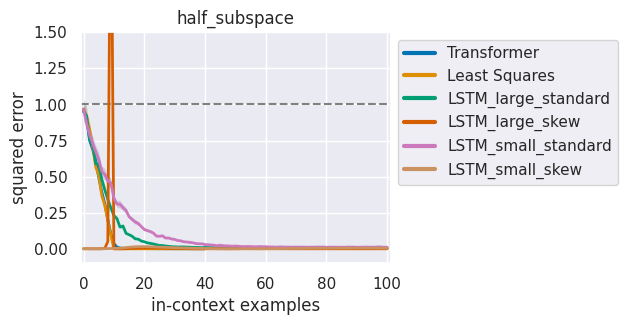

DEBUG: models ['Transformer', 'Least Squares', 'LSTM_large_standard', 'LSTM_large_skew', 'LSTM_small_standard', 'LSTM_small_skew']
DEBUG: metrics {'Transformer': {'mean': [0.9622732162475586, 1.0275540351867676, 0.9141025543212891, 0.8694589614868165, 0.8028970718383789, 0.7154922485351562, 0.7076632022857666, 0.7064539909362793, 0.7439779758453369, 0.612362289428711, 0.5695746421813965, 0.5196301460266113, 0.5218579292297363, 0.47569832801818845, 0.45649051666259766, 0.46550493240356444, 0.49918327331542967, 0.5127709865570068, 0.6197527885437012, 0.7753526210784912, 0.9675973892211914, 0.757837963104248, 0.5452767848968506, 0.410020112991333, 0.322327184677124, 0.27910263538360597, 0.2696341276168823, 0.2369563102722168, 0.1989450454711914, 0.18814512491226196, 0.1876662015914917, 0.16887385845184327, 0.16822760105133056, 0.1655745267868042, 0.1599364995956421, 0.15338915586471558, 0.1477346658706665, 0.14619187116622925, 0.14670875072479247, 0.1326284646987915, 0.1315389633178711], 

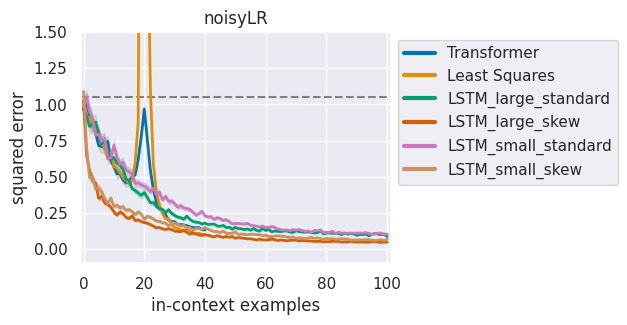

DEBUG: models ['Transformer', 'Least Squares', 'LSTM_large_standard', 'LSTM_large_skew', 'LSTM_small_standard', 'LSTM_small_skew']
DEBUG: metrics {'Transformer': {'mean': [1.0217679977416991, 0.9623150825500488, 1.0113537788391114, 0.9524394989013671, 0.9380861282348633, 1.0286196708679198, 1.0361715316772462, 0.9707786560058593, 1.0409666061401368, 1.0015620231628417, 1.0454618453979492, 1.053307342529297, 0.9913642883300782, 0.971368408203125, 0.9544370651245118, 0.9848331451416016, 0.9928735733032227, 0.9759233474731446, 1.0048845291137696, 0.9897491455078125, 0.0005352805368602276, 0.0004169079475104809, 0.0003511696355417371, 0.0002875896403566003, 0.0002620419953018427, 0.000222720461897552, 0.00018406048184260726, 0.0001728493021801114, 0.00014920710818842054, 0.00012199145276099443, 0.00012832792708650231, 0.00011993589578196406, 0.00011988093610852957, 0.00011454259511083365, 0.00010690081398934126, 0.00010612003970891237, 0.00010373826371505857, 0.00010288555640727281, 0.0001

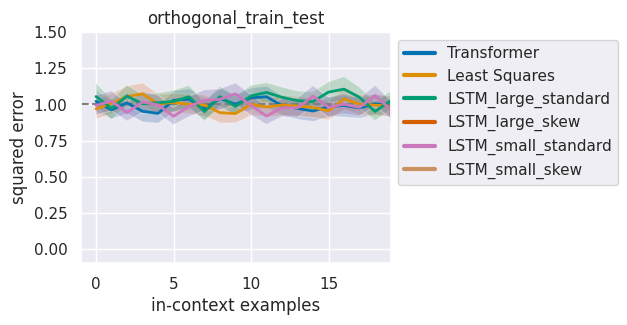

DEBUG: models ['Transformer', 'Least Squares', 'LSTM_large_standard', 'LSTM_large_skew', 'LSTM_small_standard', 'LSTM_small_skew']
DEBUG: metrics {'Transformer': {'mean': [0.940831184387207, 0.0014987039379775525, 0.00114749725908041, 0.001114297192543745, 0.0011458348482847214, 0.001237800158560276, 0.0012612286023795604, 0.0012674537487328053, 0.0013417397625744344, 0.001378537993878126, 0.0014556750655174255, 0.0015683272853493691, 0.001348533295094967, 0.001462874375283718, 0.001420062966644764, 0.0013022067956626414, 0.001177257765084505, 0.0011843990534543992, 0.001114772167056799, 0.0011945923790335656, 0.0011577241122722626, 0.0010638293810188771, 0.0010684968903660775, 0.0009141969494521618, 0.0008212359622120857, 0.0007396721746772527, 0.0007711728103458881, 0.0006737171672284604, 0.0006362859159708024, 0.0005957374814897776, 0.0006055089645087719, 0.0005502159707248211, 0.0005313376896083355, 0.0005777932703495026, 0.0005565131548792123, 0.0005112075712531805, 0.000470239948

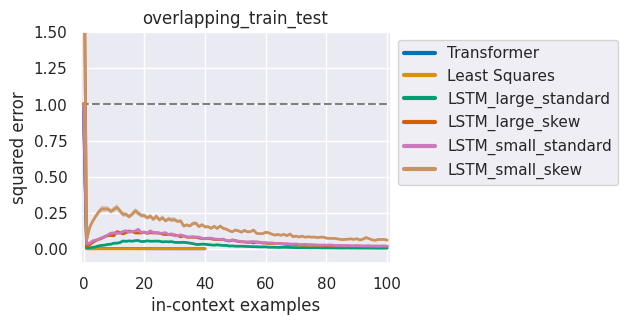

DEBUG: models ['Transformer', 'Least Squares', 'LSTM_large_standard', 'LSTM_large_skew', 'LSTM_small_standard', 'LSTM_small_skew']
DEBUG: metrics {'Transformer': {'mean': [0.9723726272583008, 0.9021141052246093, 0.8317445755004883, 0.8343681335449219, 0.7415112495422364, 0.7858212471008301, 0.6827107429504394, 0.6362492561340332, 0.6094096660614013, 0.49908981323242185, 0.49320411682128906, 0.4823903560638428, 0.3757808208465576, 0.3574350357055664, 0.32669188976287844, 0.2657474040985107, 0.21822092533111573, 0.15746629238128662, 0.1263405442237854, 0.08828676342964173, 0.061741971969604494, 0.05009779930114746, 0.03234137892723084, 0.02356511652469635, 0.019423671066761017, 0.013550607860088349, 0.012008891254663468, 0.010178913921117782, 0.00837375521659851, 0.007862187922000885, 0.006296417117118836, 0.005905334278941155, 0.005831588432192803, 0.006172683089971542, 0.004725147411227227, 0.00439193807542324, 0.004311689734458923, 0.004060768708586693, 0.004432310909032821, 0.0036802

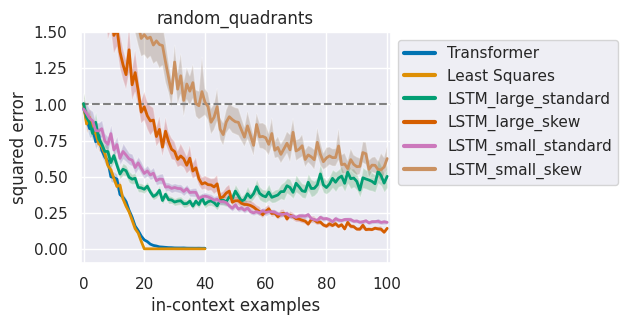

DEBUG: models ['Transformer', 'Least Squares', 'LSTM_large_standard', 'LSTM_large_skew', 'LSTM_small_standard', 'LSTM_small_skew']
DEBUG: metrics {'Transformer': {'mean': [0.11263935565948487, 0.1052499532699585, 0.10878870487213135, 0.09428604841232299, 0.08878390192985534, 0.08304386138916016, 0.0813037097454071, 0.07626004219055176, 0.062307482957839964, 0.06446815729141235, 0.05849922895431518, 0.057972317934036253, 0.060966843366622926, 0.06666772365570069, 0.06739245057106018, 0.06645221710205078, 0.07332061529159546, 0.06897982358932495, 0.07819283604621888, 0.07393417954444885, 0.09180535078048706, 0.08656083941459655, 0.07002841234207154, 0.06466649174690246, 0.057602882385253906, 0.07253302335739135, 0.06883457899093628, 0.06765939593315125, 0.06535385847091675, 0.06312512159347534, 0.06273844838142395, 0.05302093625068664, 0.04964370727539062, 0.0469857394695282, 0.049150675535202026, 0.042860060930252075, 0.03676023185253143, 0.04045611023902893, 0.031177154183387755, 0.034

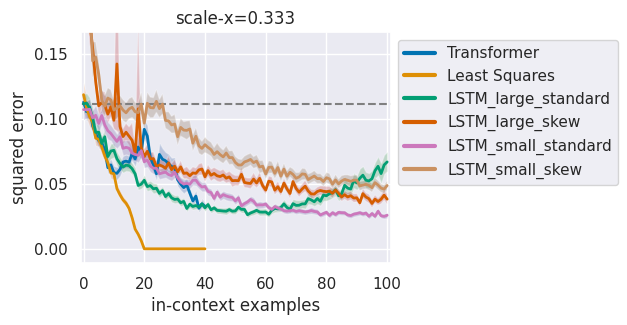

DEBUG: models ['Transformer', 'Least Squares', 'LSTM_large_standard', 'LSTM_large_skew', 'LSTM_small_standard', 'LSTM_small_skew']
DEBUG: metrics {'Transformer': {'mean': [0.26132521629333494, 0.2314812183380127, 0.22462904453277588, 0.22001609802246094, 0.2104645252227783, 0.18403265476226807, 0.1861415147781372, 0.16458022594451904, 0.1521817684173584, 0.14577999114990234, 0.1284816861152649, 0.11509463787078858, 0.0988670527935028, 0.0838518738746643, 0.07667464017868042, 0.06832257509231568, 0.058275872468948366, 0.049827557802200315, 0.04519710540771484, 0.0397896945476532, 0.03835000991821289, 0.0251502126455307, 0.019971027970314026, 0.015980960428714754, 0.009741304069757461, 0.008628240972757339, 0.008496088534593582, 0.007617680728435517, 0.00693863034248352, 0.005528637021780014, 0.005279135704040527, 0.005229421705007553, 0.004985390231013298, 0.004106765985488892, 0.004219724610447883, 0.004021129757165909, 0.0035730734467506408, 0.0036132495850324632, 0.003064510226249694

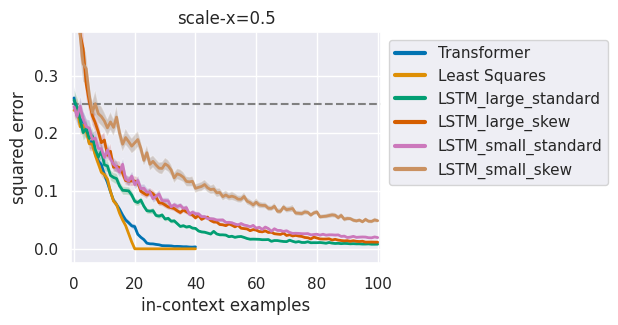

DEBUG: models ['Transformer', 'Least Squares', 'LSTM_large_standard', 'LSTM_large_skew', 'LSTM_small_standard', 'LSTM_small_skew']
DEBUG: metrics {'Transformer': {'mean': [3.8108863830566406, 3.7467414855957033, 3.3756172180175783, 3.3391143798828127, 3.2795654296875, 3.1881969451904295, 2.852968215942383, 2.685258483886719, 2.584675598144531, 2.3638422012329103, 2.0083124160766603, 2.036523628234863, 1.728397750854492, 1.6961437225341798, 1.4508331298828125, 1.3448893547058105, 1.114530372619629, 0.9832470893859864, 1.0469706535339356, 0.7757928371429443, 0.7101222038269043, 0.6044591426849365, 0.5471387386322022, 0.4557938098907471, 0.42403254508972166, 0.39744930267333983, 0.3612881898880005, 0.3200347900390625, 0.2699571132659912, 0.23468937873840331, 0.2514296293258667, 0.20341148376464843, 0.1788333535194397, 0.1984223961830139, 0.1855767011642456, 0.1812267541885376, 0.15858099460601807, 0.18952928781509398, 0.17169761657714844, 0.17498867511749266, 0.1701072335243225], 'std': [

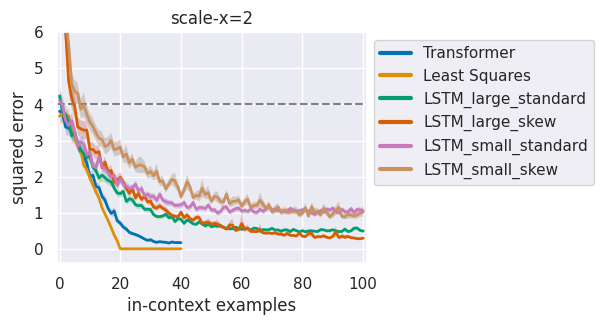

DEBUG: models ['Transformer', 'Least Squares', 'LSTM_large_standard', 'LSTM_large_skew', 'LSTM_small_standard', 'LSTM_small_skew']
DEBUG: metrics {'Transformer': {'mean': [8.363350677490235, 9.056748199462891, 8.72424087524414, 8.497202301025391, 8.47382049560547, 8.525755310058594, 8.951703643798828, 8.178002166748048, 7.7466278076171875, 7.1440589904785154, 7.451252746582031, 7.257946014404297, 7.026573181152344, 7.131730651855468, 7.1393287658691404, 7.131278228759766, 6.83177490234375, 6.803401184082031, 6.69366683959961, 7.104339599609375, 6.895304870605469, 6.954570770263672, 7.44923095703125, 7.15203628540039, 6.958148193359375, 6.979661560058593, 6.567128753662109, 6.458769226074219, 6.7116142272949215, 5.796712493896484, 6.223550415039062, 5.911818313598633, 6.160560226440429, 5.659481048583984, 5.4288898468017575, 5.813561248779297, 5.173865890502929, 5.073271560668945, 4.987874221801758, 4.985746002197265, 5.250712966918945], 'std': [13.582325744628907, 13.449751281738282, 1

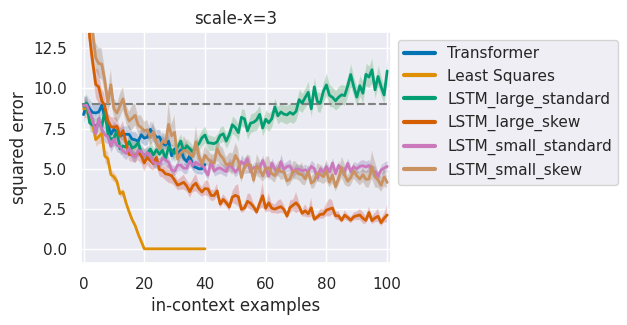

DEBUG: models ['Transformer', 'Least Squares', 'LSTM_large_standard', 'LSTM_large_skew', 'LSTM_small_standard', 'LSTM_small_skew']
DEBUG: metrics {'Transformer': {'mean': [0.11549080610275268, 0.10805983543395996, 0.10165340900421142, 0.0966391921043396, 0.08559033274650574, 0.08194503784179688, 0.07813478112220765, 0.07779597043991089, 0.06637449860572815, 0.054783213138580325, 0.05676696300506592, 0.053928029537200925, 0.05098389983177185, 0.04085145890712738, 0.03632102608680725, 0.028708696365356445, 0.023786625266075133, 0.0195330411195755, 0.012717559933662415, 0.0076823137700557705, 0.004195136949419975, 0.001523725688457489, 0.0009323211386799812, 0.0005231701768934726, 0.00039726989343762397, 0.00032756763976067306, 0.0002802065573632717, 0.00023161377757787704, 0.00023346529342234136, 0.00021350146271288396, 0.0001901243580505252, 0.00017933065537363292, 0.00015948578948155046, 0.00016595773631706835, 0.00015940781449899077, 0.00014826547121629118, 0.0001537959324195981, 0.00

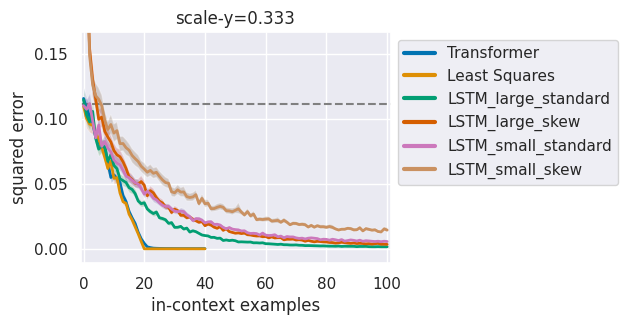

DEBUG: models ['Transformer', 'Least Squares', 'LSTM_large_standard', 'LSTM_large_skew', 'LSTM_small_standard', 'LSTM_small_skew']
DEBUG: metrics {'Transformer': {'mean': [0.27016620635986327, 0.2323958158493042, 0.2443772077560425, 0.2155749797821045, 0.19334783554077148, 0.18856691122055053, 0.1711963891983032, 0.16011664867401124, 0.14373611211776732, 0.13321586847305297, 0.126874840259552, 0.10924004316329956, 0.09990178942680358, 0.08682916760444641, 0.07767063975334168, 0.05334171652793884, 0.05108059048652649, 0.03426468968391418, 0.02665106952190399, 0.01624525785446167, 0.007001683861017227, 0.003145839646458626, 0.0014108547940850258, 0.0007925203070044517, 0.0006176239345222712, 0.00046148309484124185, 0.0004055507481098175, 0.0003768295049667358, 0.0003065489465370774, 0.0003192091826349497, 0.0003051817649975419, 0.00024140032473951578, 0.0002446077298372984, 0.00025985694956034424, 0.00024580010212957857, 0.00023599821142852306, 0.00023108171299099923, 0.00020793227013200

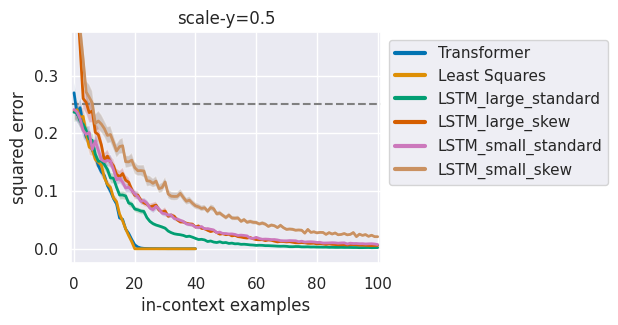

DEBUG: models ['Transformer', 'Least Squares', 'LSTM_large_standard', 'LSTM_large_skew', 'LSTM_small_standard', 'LSTM_small_skew']
DEBUG: metrics {'Transformer': {'mean': [3.884858322143555, 3.5958580017089843, 3.9473400115966797, 3.1379764556884764, 3.415779876708984, 2.9435070037841795, 2.8754642486572264, 2.7411340713500976, 2.3988285064697266, 2.3458337783813477, 2.0143075942993165, 1.788376235961914, 1.6158012390136718, 1.4496881484985351, 1.1748419761657716, 0.9838897705078125, 0.8644155502319336, 0.5919861793518066, 0.39805283546447756, 0.27087883949279784, 0.12296416759490966, 0.08155436515808105, 0.038664957880973815, 0.024015405774116518, 0.020281748473644258, 0.012737059593200683, 0.015109120309352875, 0.011237005144357682, 0.022356510162353516, 0.009734396636486054, 0.010049118846654891, 0.009475813806056976, 0.009481707960367203, 0.009109693765640258, 0.009528668224811554, 0.009279845654964447, 0.008180129528045654, 0.0076809443533420564, 0.007245028018951416, 0.0093517497

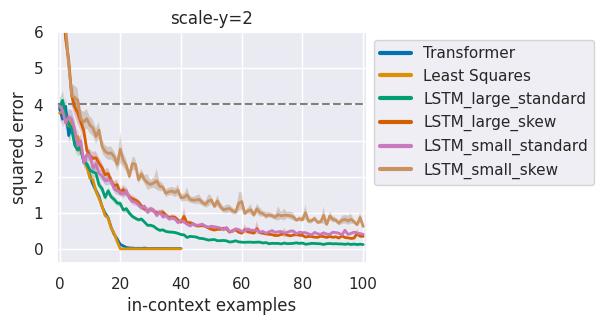

DEBUG: models ['Transformer', 'Least Squares', 'LSTM_large_standard', 'LSTM_large_skew', 'LSTM_small_standard', 'LSTM_small_skew']
DEBUG: metrics {'Transformer': {'mean': [8.735563659667969, 8.629513549804688, 8.3698974609375, 8.144062042236328, 6.867694091796875, 7.353468322753907, 6.60435791015625, 5.634857177734375, 5.362101364135742, 5.400809860229492, 4.623461532592773, 4.662681579589844, 3.802836227416992, 3.450788879394531, 2.6795785903930662, 2.4961469650268553, 2.130075454711914, 1.6558345794677733, 1.239729118347168, 1.0048139572143555, 0.7813796997070312, 0.5589460849761962, 0.43280415534973143, 0.3910136461257935, 0.27915453910827637, 0.2925879955291748, 0.2912109136581421, 0.36824238300323486, 0.2597254753112793, 0.25039670467376707, 0.30399794578552247, 0.2597480535507202, 0.1835322141647339, 0.2714396476745605, 0.22619597911834716, 0.212664794921875, 0.23559203147888183, 0.26570839881896974, 0.2382401704788208, 0.2542322874069214, 0.25000524520874023], 'std': [13.3462432

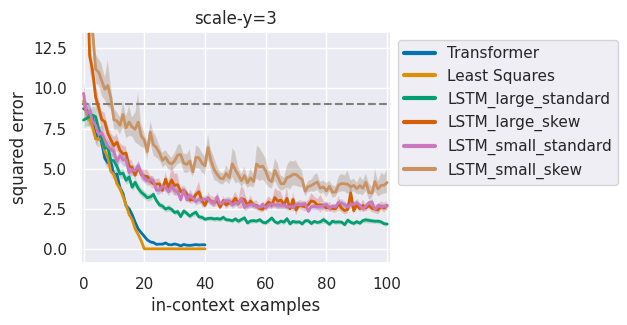

DEBUG: models ['Transformer', 'Least Squares', 'LSTM_large_standard', 'LSTM_large_skew', 'LSTM_small_standard', 'LSTM_small_skew']
DEBUG: metrics {'Transformer': {'mean': [1.0172086715698243, 0.6402848720550537, 0.5014616489410401, 0.3776614427566528, 0.31359572410583497, 0.2116999626159668, 0.18059089183807372, 0.15971052646636963, 0.1399226188659668, 0.11061776876449585, 0.1028898000717163, 0.11127077341079712, 0.10663849115371704, 0.1094159483909607, 0.1145581603050232, 0.11590192317962647, 0.09470928311347962, 0.10462424755096436, 0.10046427249908448, 0.14134728908538818, 0.11887277364730835, 0.11603138446807862, 0.12148859500885009, 0.10129406452178955, 0.11050920486450196, 0.11128654479980468, 0.12795674800872803, 0.12330986261367798, 0.1367938280105591, 0.14273830652236938, 0.14310156106948851, 0.11852085590362549, 0.13730885982513427, 0.11852630376815795, 0.15389941930770873, 0.11677205562591553, 0.10656915903091431, 0.12296102046966553, 0.1085016131401062, 0.09641695022583008,

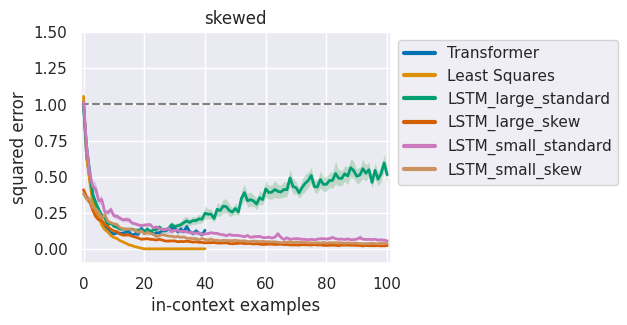

In [5]:
# plot any OOD metrics
for name, metric in metrics.items():
    if name == "standard": continue
   
    if "scale" in name:
        scale = float(name.split("=")[-1])**2
    else:
        scale = 1.0

    trivial = 1.0 if "noisy" not in name else (1+1/n_dims)
    fig, ax = basic_plot(metric, models=models, trivial=trivial * scale)
    ax.set_title(name)
    
    if "ortho" in name:
        ax.set_xlim(-1, n_dims - 1)
    ax.set_ylim(-.1 * scale, 1.5 * scale)

    plt.show()

# Interactive setup

We will now directly load the model and measure its in-context learning ability on a batch of random inputs. (In the paper we average over multiple such batches to obtain better estimates.)

In [6]:
from samplers import get_data_sampler
from tasks import get_task_sampler

In [7]:
model, conf = get_model_from_run(run_path)

n_dims = conf.model.n_dims
batch_size = conf.training.batch_size

data_sampler = get_data_sampler(conf.training.data, n_dims)
task_sampler = get_task_sampler(
    conf.training.task,
    n_dims,
    batch_size,
    **conf.training.task_kwargs
)

NameError: name 'run_path' is not defined

In [ ]:
task = task_sampler()
xs = data_sampler.sample_xs(b_size=batch_size, n_points=conf.training.curriculum.points.end)
ys = task.evaluate(xs)

In [ ]:
with torch.no_grad():

    pred = model(xs, ys)

In [ ]:
metric = task.get_metric()
loss = metric(pred, ys).numpy()

sparsity = conf.training.task_kwargs.sparsity if "sparsity" in conf.training.task_kwargs else None
baseline = {
    "linear_regression": n_dims,
    "sparse_linear_regression": sparsity,
    "relu_2nn_regression": n_dims,
    "decision_tree": 1,
}[conf.training.task]

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.show()

As an exploration example, let's see how robust the model is to doubling all the inputs.

In [ ]:
xs2 = 2 * xs
ys2 = task.evaluate(xs2)
with torch.no_grad():
    pred2 = model(xs2, ys2)

In [ ]:
loss2 = metric(pred2, ys2).numpy()

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.plot(loss2.mean(axis=0) / 4, lw=2, label="Transformer on doubled inputs")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.show()

The error does increase, especially when the number of in-context examples exceeds the dimension, but the model is still relatively accurate.